# EDA

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scripts import ds_ultils

## Hypothesis 1 How important is grid position in the race? - Tableau plot

## Drivers all time pole positions - tableau



In [2]:
ergast_combined_df=pd.read_csv('./data/clean/combined_ergast_clean.csv')

C:\Users\ben44\AppData\Local\Temp\ipykernel_22976\450351449.py:1: DtypeWarning: Columns (8,9,39,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  ergast_combined_df=pd.read_csv('./data/clean/combined_ergast_clean.csv')


In [3]:
ergast_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   raceId                        9455 non-null   int64  
 1   year                          9455 non-null   int64  
 2   circuitId                     9455 non-null   int64  
 3   name                          9455 non-null   object 
 4   date                          9455 non-null   object 
 5   time                          7227 non-null   object 
 6   quali_date                    759 non-null    object 
 7   quali_time                    320 non-null    object 
 8   sprint_date                   100 non-null    object 
 9   sprint_time                   40 non-null     object 
 10  lat_x                         9455 non-null   float64
 11  lng_x                         9455 non-null   float64
 12  race_temp                     9455 non-null   float64
 13  rac

In [4]:
ergast_combined_df['pole']=ergast_combined_df['quali_position'].apply(lambda x: 1 if x ==1 else 0)

In [5]:
ergast_combined_df.columns

Index(['raceId', 'year', 'circuitId', 'name', 'date', 'time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'lat_x', 'lng_x',
       'race_temp', 'race_precip', 'race_humidity', 'quali_temp',
       'quali_precip', 'quali_humidity', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'race_condition_wiki',
       'quali_condition_clean', 'circuitRef', 'location', 'country', 'alt',
       'qualifyId', 'driverId', 'constructorId', 'quali_position', 'q1', 'q2',
       'q3', 'resultId_x', 'grid_sprint', 'positionText_sprint',
       'positionOrder_sprint', 'points_sprint', 'laps_sprint',
       'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint',
       'status_sprint', 'resultId_y', 'grid', 'positionText', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'status', 'driverStandingsId',
       'points_drivers', 'position_drivers', 'wins_drivers',
       'c

## Is there a relationship between Drivers and poles?

## Do drivers have favourite circuits?

In [6]:
driverpoles = ergast_combined_df.groupby(['driverRef','circuitRef'])['pole'].sum()

In [7]:
driverspoles_1_more=ergast_combined_df.groupby(['driverRef'])['pole'].sum()

In [8]:
drivers = list(driverspoles_1_more[driverspoles_1_more>0].index)

In [9]:
temp = driverpoles.unstack()

In [10]:
temp

circuitRef,adelaide,albert_park,americas,bahrain,baku,buddh,catalunya,estoril,fuji,galvez,...,shanghai,silverstone,sochi,spa,suzuka,valencia,villeneuve,yas_marina,yeongam,zandvoort
driverRef,,,,,,,,,,,,,,,,,,,,,
adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
aitken,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
albers,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
albon,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0
alboreto,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yamamoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
yoong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
zanardi,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [11]:
poles_circuits = temp[temp.index.isin(drivers)]

In [12]:
poles_circuits.columns

Index(['adelaide', 'albert_park', 'americas', 'bahrain', 'baku', 'buddh',
       'catalunya', 'estoril', 'fuji', 'galvez', 'hockenheimring',
       'hungaroring', 'imola', 'indianapolis', 'interlagos', 'istanbul',
       'jeddah', 'jerez', 'losail', 'magny_cours', 'marina_bay', 'miami',
       'monaco', 'monza', 'mugello', 'nurburgring', 'okayama', 'portimao',
       'red_bull_ring', 'ricard', 'rodriguez', 'sepang', 'shanghai',
       'silverstone', 'sochi', 'spa', 'suzuka', 'valencia', 'villeneuve',
       'yas_marina', 'yeongam', 'zandvoort'],
      dtype='object', name='circuitRef')

In [13]:
poles_circuits.columns =[ 'adelaide', 'albert_park', 'americas', 'bahrain', 'baku',
       'buddh', 'catalunya', 'estoril', 'fuji', 'galvez', 'hockenheimring',
       'hungaroring', 'imola', 'indianapolis', 'interlagos', 'istanbul',
       'jeddah', 'jerez', 'losail', 'magny_cours', 'marina_bay', 'miami',
       'monaco', 'monza', 'mugello', 'nurburgring', 'okayama', 'portimao',
       'red_bull_ring', 'ricard', 'rodriguez', 'sepang', 'shanghai',
       'silverstone', 'sochi', 'spa', 'suzuka', 'valencia', 'villeneuve',
       'yas_marina', 'yeongam', 'zandvoort']

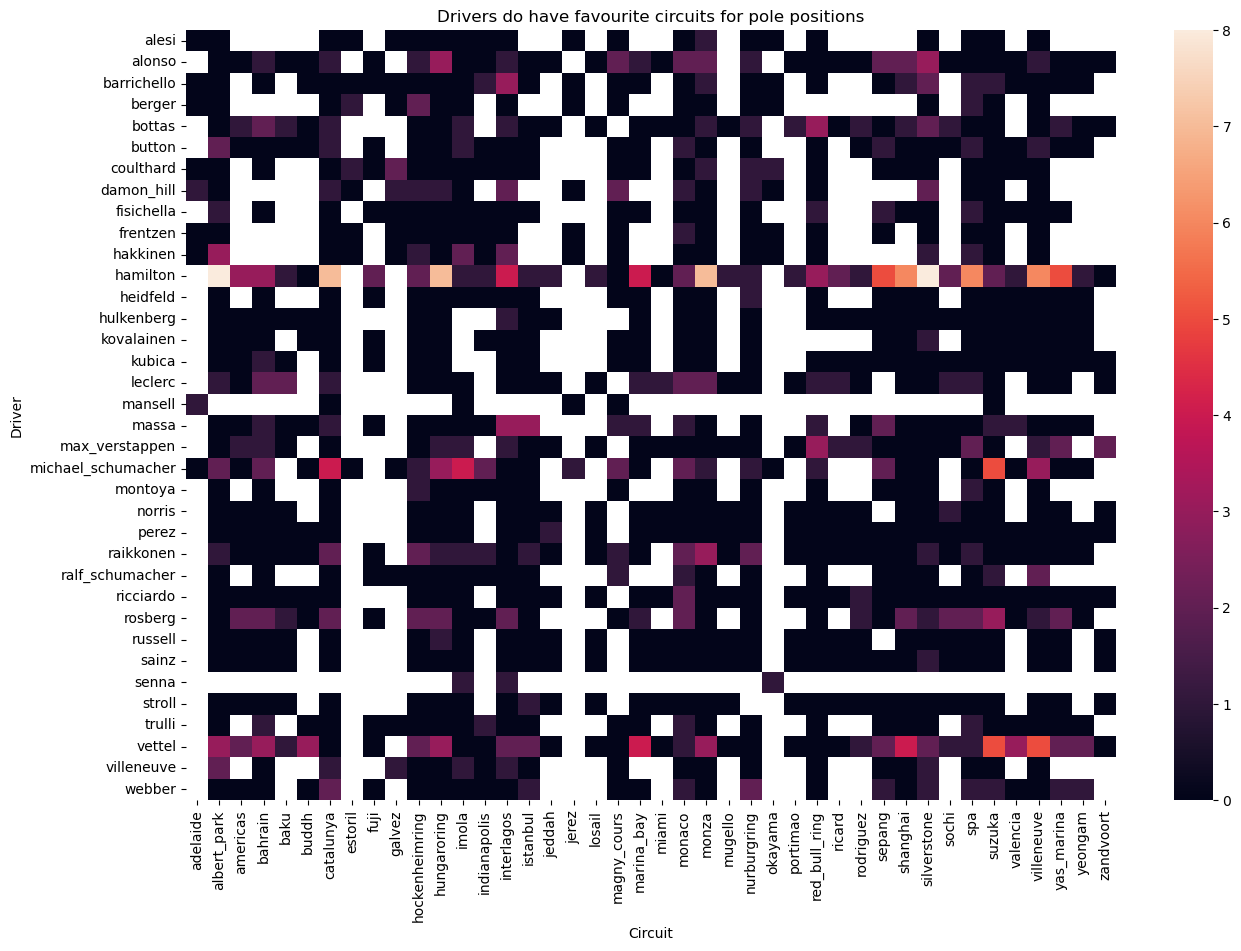

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(poles_circuits)
plt.title('Drivers do have favourite circuits for pole positions')
plt.xlabel('Circuit')
plt.ylabel('Driver')
plt.show()

In [15]:
poles_circuits

,adelaide,albert_park,americas,bahrain,baku,buddh,catalunya,estoril,fuji,galvez,...,shanghai,silverstone,sochi,spa,suzuka,valencia,villeneuve,yas_marina,yeongam,zandvoort
driverRef,,,,,,,,,,,,,,,,,,,,,
alesi,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
alonso,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,NaN,...,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
barrichello,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,NaN
berger,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,...,NaN,0.0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN
bottas,NaN,0.0,1.0,2.0,1.0,0.0,1.0,NaN,NaN,NaN,...,1.0,2.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0
button,NaN,2.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
coulthard,0.0,0.0,NaN,0.0,NaN,NaN,0.0,1.0,0.0,2.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
damon_hill,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.0,...,NaN,2.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
fisichella,NaN,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN


In [59]:
temp2 = poles_circuits.drop(index=['senna','mansell'])
temp2 = temp2[(~temp2.isna().any(axis=0)).index]

In [60]:
cirs =list((~temp2.isna().any(axis=0)).index)
vals =list((~temp2.isna().any(axis=0)).values)
inds = [i for i,x in enumerate(vals) if x==True]
keep = [x for i,x in enumerate(cirs) if i in inds]
temp2 = temp2[keep]

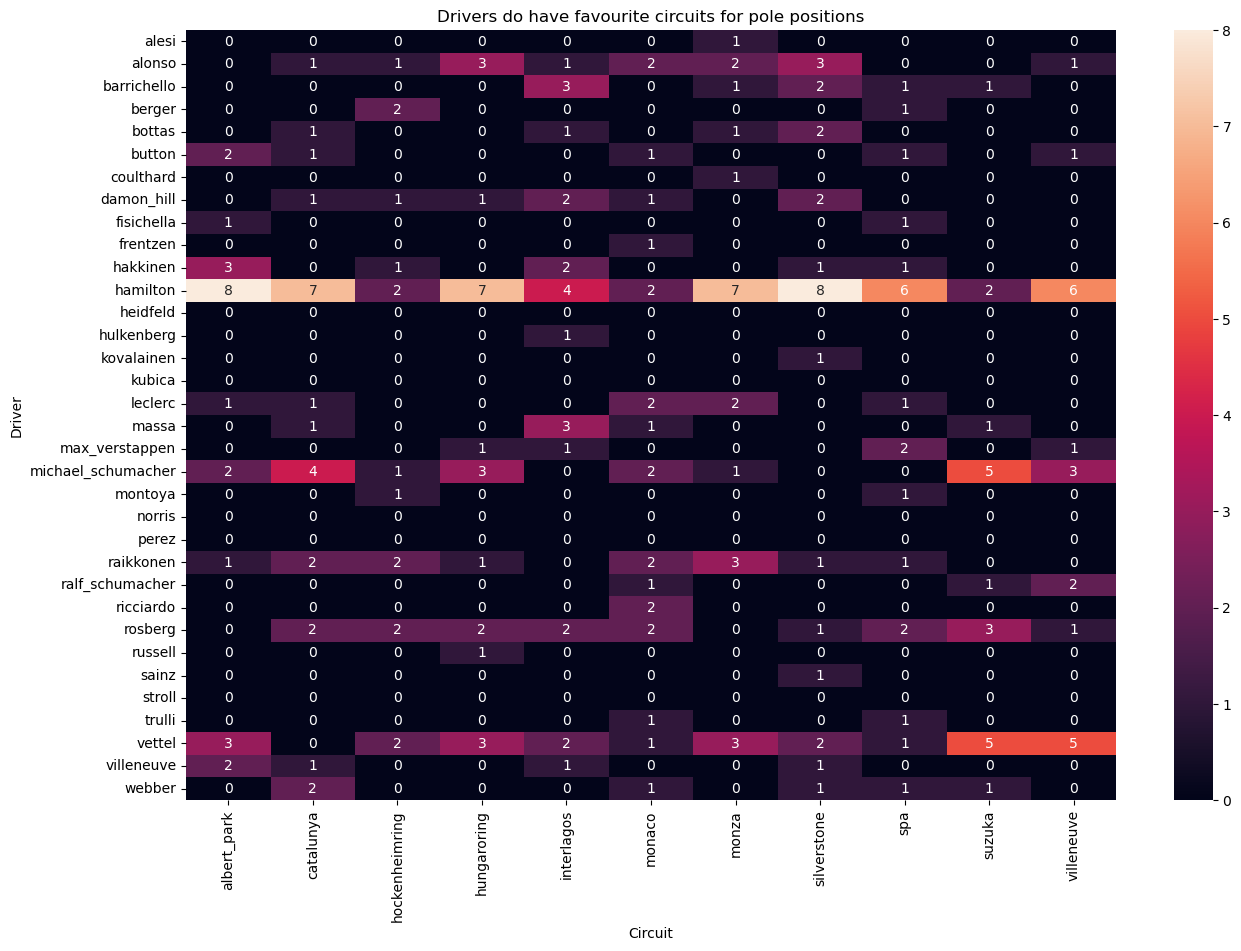

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(temp2,annot=True)
plt.title('Drivers do have favourite circuits for pole positions')
plt.xlabel('Circuit')
plt.ylabel('Driver')
plt.show()

In [19]:
temp3 = temp2[~(temp2==0).all(axis=1)]

In [20]:
stats.chi2_contingency(temp3)

(311.8742129005945,
 0.092273103843006,
 280,
 array([[0.09704641, 0.10126582, 0.06329114, 0.092827  , 0.09704641,
         0.092827  , 0.092827  , 0.10970464, 0.08860759, 0.08016878,
         0.08438819],
        [1.35864979, 1.41772152, 0.88607595, 1.29957806, 1.35864979,
         1.29957806, 1.29957806, 1.53586498, 1.24050633, 1.12236287,
         1.1814346 ],
        [0.77637131, 0.81012658, 0.50632911, 0.74261603, 0.77637131,
         0.74261603, 0.74261603, 0.87763713, 0.70886076, 0.64135021,
         0.67510549],
        [0.29113924, 0.30379747, 0.18987342, 0.27848101, 0.29113924,
         0.27848101, 0.27848101, 0.32911392, 0.26582278, 0.24050633,
         0.25316456],
        [0.48523207, 0.50632911, 0.3164557 , 0.46413502, 0.48523207,
         0.46413502, 0.46413502, 0.54852321, 0.44303797, 0.40084388,
         0.42194093],
        [0.58227848, 0.60759494, 0.37974684, 0.55696203, 0.58227848,
         0.55696203, 0.55696203, 0.65822785, 0.53164557, 0.48101266,
         0.50632

A chi2 test between the two categorical variables of drivers and circuits, counting pole positions. A chi2 test has the null hypothesis that the count of poles over the circuits will be equal for drivers. The alternative hypothesis is that there is a relationship between drivers and circuits.

However, not all drivers drove the same circuit therefore we tested only the circuits all drivers had competed at. This gave a pvalue of 0.09 and therefore we can not reject the null hypothesis

Looking at the heatmap it seems to suggest some drivers have a preference like Michael Schumacher and Vettel at Suzuka. However because lots of drivers only got 1 pole at one track they have a lot of 0's at the other tracks and therefore suggest there is not relationship.

If we repeat the test for drivers with more than 1 pole

In [21]:
drivers2 = list(driverspoles_1_more[driverspoles_1_more>1].index)
temp4 = temp3[temp3.index.isin(drivers2)]

In [22]:
stats.chi2_contingency(temp4)

(256.126635170351,
 0.04770893999131658,
 220,
 array([[1.39393939, 1.45454545, 0.90909091, 1.27272727, 1.33333333,
         1.27272727, 1.27272727, 1.45454545, 1.27272727, 1.15151515,
         1.21212121],
        [0.7965368 , 0.83116883, 0.51948052, 0.72727273, 0.76190476,
         0.72727273, 0.72727273, 0.83116883, 0.72727273, 0.65800866,
         0.69264069],
        [0.2987013 , 0.31168831, 0.19480519, 0.27272727, 0.28571429,
         0.27272727, 0.27272727, 0.31168831, 0.27272727, 0.24675325,
         0.25974026],
        [0.4978355 , 0.51948052, 0.32467532, 0.45454545, 0.47619048,
         0.45454545, 0.45454545, 0.51948052, 0.45454545, 0.41125541,
         0.43290043],
        [0.5974026 , 0.62337662, 0.38961039, 0.54545455, 0.57142857,
         0.54545455, 0.54545455, 0.62337662, 0.54545455, 0.49350649,
         0.51948052],
        [0.0995671 , 0.1038961 , 0.06493506, 0.09090909, 0.0952381 ,
         0.09090909, 0.09090909, 0.1038961 , 0.09090909, 0.08225108,
         0.0865

If we repeat the chi2 test for the drivers with more than 1 pole we can see it reduces and is beneath 0.05 confidence interval. However only marginally. Therefore there could be a relationship between drivers and tracks for pole positions. However it does not seem significant at this stage. This will be investigated further

## Are drivers better in wet or dry?

In [87]:
wet_or_dry= ergast_combined_df.groupby(['driverRef','quali_condition_clean'])['pole'].sum()
wet_or_dry_total= ergast_combined_df.groupby(['driverRef'])['pole'].sum()
wet_or_dry_total= wet_or_dry_total[wet_or_dry_total>1]
wet_or_dry_poles= wet_or_dry[wet_or_dry>1]
percent_conditions = (wet_or_dry_poles/wet_or_dry_total)*100
percent_conditions=percent_conditions.reset_index()

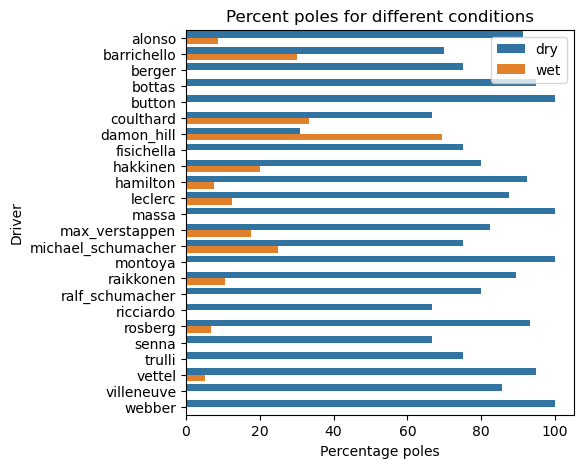

In [89]:
plt.figure(figsize=(5,5))
sns.barplot(data=percent_conditions,x='pole',y='driverRef',hue='quali_condition_clean')
#percent_conditions.plot(kind='barh',stacked=True)
plt.legend(loc='upper right')
plt.title('Percent poles for different conditions')
plt.ylabel('Driver')
plt.xlabel('Percentage poles')
plt.show()

Whilst on the whole most qualifying sessions are dry and hence this percentage is not fully representative. In is interesting to note Barrichello, Coulthard and especially Damon Hill did well in the wet and had a higher percentage of wet poles than others

## Statistical Test

# Do constructors impact pole position?

In [25]:
cons_poles = ergast_combined_df.groupby(['constructorRef'])['pole'].sum()
data=cons_poles[cons_poles>1]
data= data.reset_index()

In [26]:
data

,constructorRef,pole
0,bar,2
1,benetton,11
2,brawn,5
3,ferrari,93
4,mclaren,56
5,mercedes,131
6,red_bull,77
7,renault,20
8,toyota,3
9,williams,38


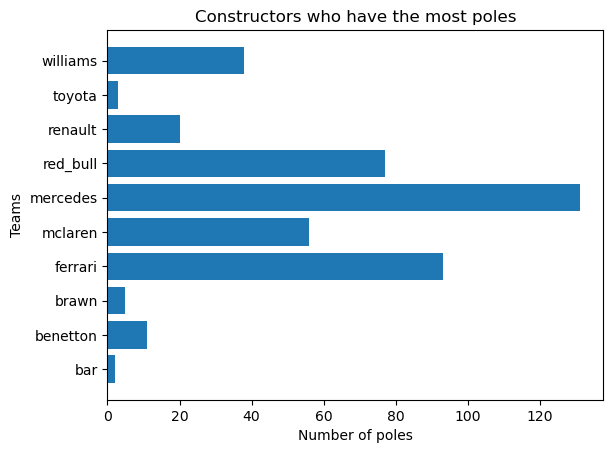

In [27]:
plt.figure()
plt.barh(y=data['constructorRef'],width=data['pole'])
plt.title('Constructors who have the most poles')
plt.xlabel('Number of poles')
plt.ylabel('Teams')
plt.show()

## Statistical Test

In [28]:
data.T

,0,1,2,3,4,5,6,7,8,9
constructorRef,bar,benetton,brawn,ferrari,mclaren,mercedes,red_bull,renault,toyota,williams
pole,2,11,5,93,56,131,77,20,3,38


# Do cars prefer different tracks for pole positions?

In [29]:
carspoles = ergast_combined_df.groupby(['constructorRef','circuitRef'])['pole'].sum()
carspoles_1_more=ergast_combined_df.groupby(['constructorRef'])['pole'].sum()
cars = list(carspoles_1_more[carspoles_1_more>1].index)
temp = carspoles.unstack()
car_poles_circuits = temp[temp.index.isin(cars)]

In [30]:
car_poles_circuits

circuitRef,adelaide,albert_park,americas,bahrain,baku,buddh,catalunya,estoril,fuji,galvez,...,shanghai,silverstone,sochi,spa,suzuka,valencia,villeneuve,yas_marina,yeongam,zandvoort
constructorRef,,,,,,,,,,,,,,,,,,,,,
bar,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,NaN
benetton,0.0,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,2.0,NaN,2.0,NaN,NaN,NaN
brawn,NaN,1.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN
ferrari,0.0,4.0,0.0,6.0,3.0,0.0,5.0,1.0,0.0,0.0,...,2.0,4.0,2.0,3.0,6.0,1.0,3.0,0.0,0.0,0.0
mclaren,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,2.0,4.0,1.0,4.0,0.0,1.0,3.0,2.0,1.0,0.0
mercedes,NaN,6.0,6.0,7.0,3.0,0.0,9.0,NaN,NaN,NaN,...,7.0,10.0,5.0,7.0,5.0,0.0,4.0,6.0,0.0,0.0
red_bull,NaN,3.0,3.0,3.0,0.0,3.0,2.0,NaN,0.0,NaN,...,3.0,3.0,0.0,4.0,5.0,3.0,4.0,5.0,3.0,2.0
renault,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,NaN,...,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
toyota,NaN,0.0,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN


<AxesSubplot: xlabel='circuitRef', ylabel='constructorRef'>

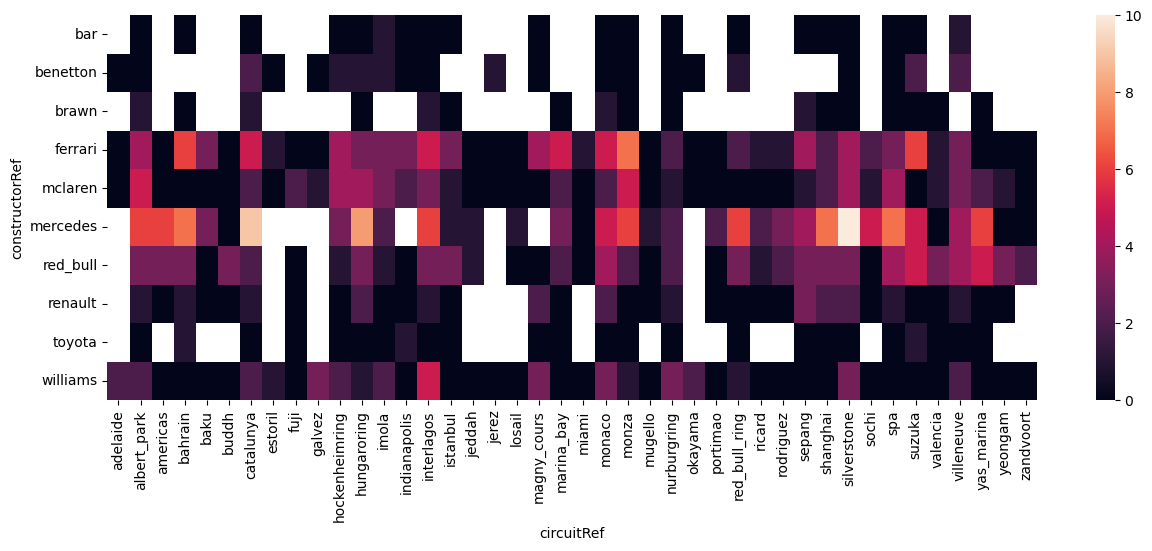

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(car_poles_circuits)

In [32]:
temp2 =car_poles_circuits.copy()
cirs =list((~temp2.isna().any(axis=0)).index)
vals =list((~temp2.isna().any(axis=0)).values)
inds = [i for i,x in enumerate(vals) if x==True]
keep = [x for i,x in enumerate(cirs) if i in inds]
temp2 = temp2[keep]

<AxesSubplot: xlabel='circuitRef', ylabel='constructorRef'>

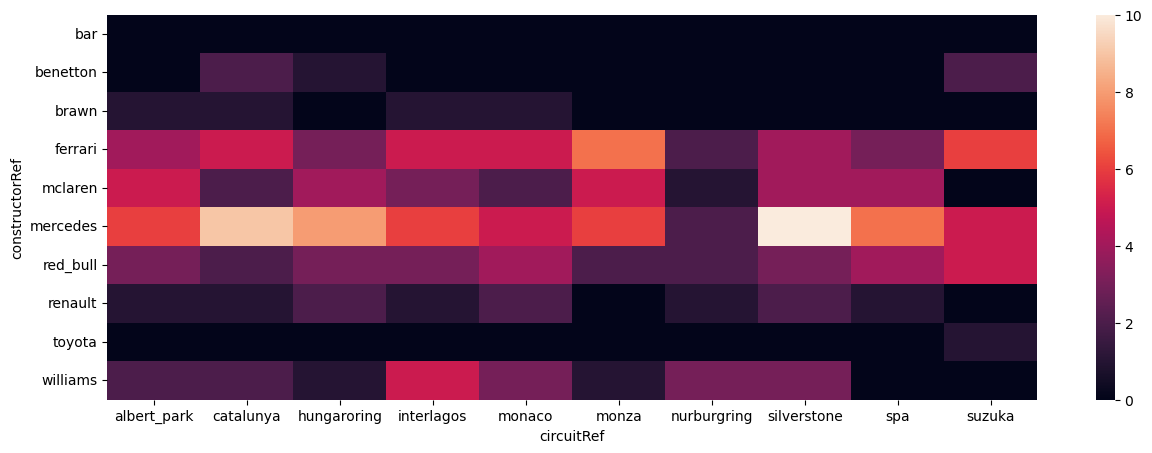

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(temp2)

In [34]:
stats.chi2_contingency(temp2.drop(index='bar')) # had to drop bar as had 0 on top row

(62.02234186183955,
 0.7930523222412341,
 72,
 array([[0.52380952, 0.57142857, 0.52380952, 0.57142857, 0.52380952,
         0.5       , 0.26190476, 0.61904762, 0.45238095, 0.45238095],
        [0.41904762, 0.45714286, 0.41904762, 0.45714286, 0.41904762,
         0.4       , 0.20952381, 0.4952381 , 0.36190476, 0.36190476],
        [4.60952381, 5.02857143, 4.60952381, 5.02857143, 4.60952381,
         4.4       , 2.3047619 , 5.44761905, 3.98095238, 3.98095238],
        [3.14285714, 3.42857143, 3.14285714, 3.42857143, 3.14285714,
         3.        , 1.57142857, 3.71428571, 2.71428571, 2.71428571],
        [6.7047619 , 7.31428571, 6.7047619 , 7.31428571, 6.7047619 ,
         6.4       , 3.35238095, 7.92380952, 5.79047619, 5.79047619],
        [3.24761905, 3.54285714, 3.24761905, 3.54285714, 3.24761905,
         3.1       , 1.62380952, 3.83809524, 2.8047619 , 2.8047619 ],
        [1.15238095, 1.25714286, 1.15238095, 1.25714286, 1.15238095,
         1.1       , 0.57619048, 1.36190476, 0.9952

On face value it does not seem that there is a significant relationship between tracks and teams. the top teams seem to spread their poles out over the tracks. A chi2 test shows the p value is high and therefore we can not reject the null hypothesis that teams and circuits are independent regarding pole positions

In [35]:
ergast_combined_df.columns

Index(['raceId', 'year', 'circuitId', 'name', 'date', 'time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'lat_x', 'lng_x',
       'race_temp', 'race_precip', 'race_humidity', 'quali_temp',
       'quali_precip', 'quali_humidity', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'race_condition_wiki',
       'quali_condition_clean', 'circuitRef', 'location', 'country', 'alt',
       'qualifyId', 'driverId', 'constructorId', 'quali_position', 'q1', 'q2',
       'q3', 'resultId_x', 'grid_sprint', 'positionText_sprint',
       'positionOrder_sprint', 'points_sprint', 'laps_sprint',
       'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint',
       'status_sprint', 'resultId_y', 'grid', 'positionText', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'status', 'driverStandingsId',
       'points_drivers', 'position_drivers', 'wins_drivers',
       'c

# Is there a correlation between grid and pole position?

In [36]:
(ergast_combined_df['grid'].isna()).sum()

10

In [37]:
(ergast_combined_df['positionOrder'].isna()).sum()

10

In [38]:
ergast_combined_df.loc[ergast_combined_df['positionOrder'].isna(),['grid','positionOrder']]

,grid,positionOrder
4429,NaN,NaN
4430,NaN,NaN
6124,NaN,NaN
6125,NaN,NaN
8460,NaN,NaN
8461,NaN,NaN
8927,NaN,NaN
8928,NaN,NaN
9070,NaN,NaN
9071,NaN,NaN


In [39]:
len(ergast_combined_df)

9455

In [40]:
len(ergast_combined_df['positionOrder'].dropna())

9445

In [41]:
ergast_combined_df['positionOrder'].dropna().index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454],
           dtype='int64', length=9445)

In [42]:
ergast_combined_df_grid_no_nan = ergast_combined_df.iloc[ergast_combined_df['positionOrder'].dropna().index]

Pearsonsr Statistical Correlation Test:
-----------------
grid pearsonsr correlation test against positionOrder : 
 PearsonRResult(statistic=0.5397644157372334, pvalue=0.0)

------------------


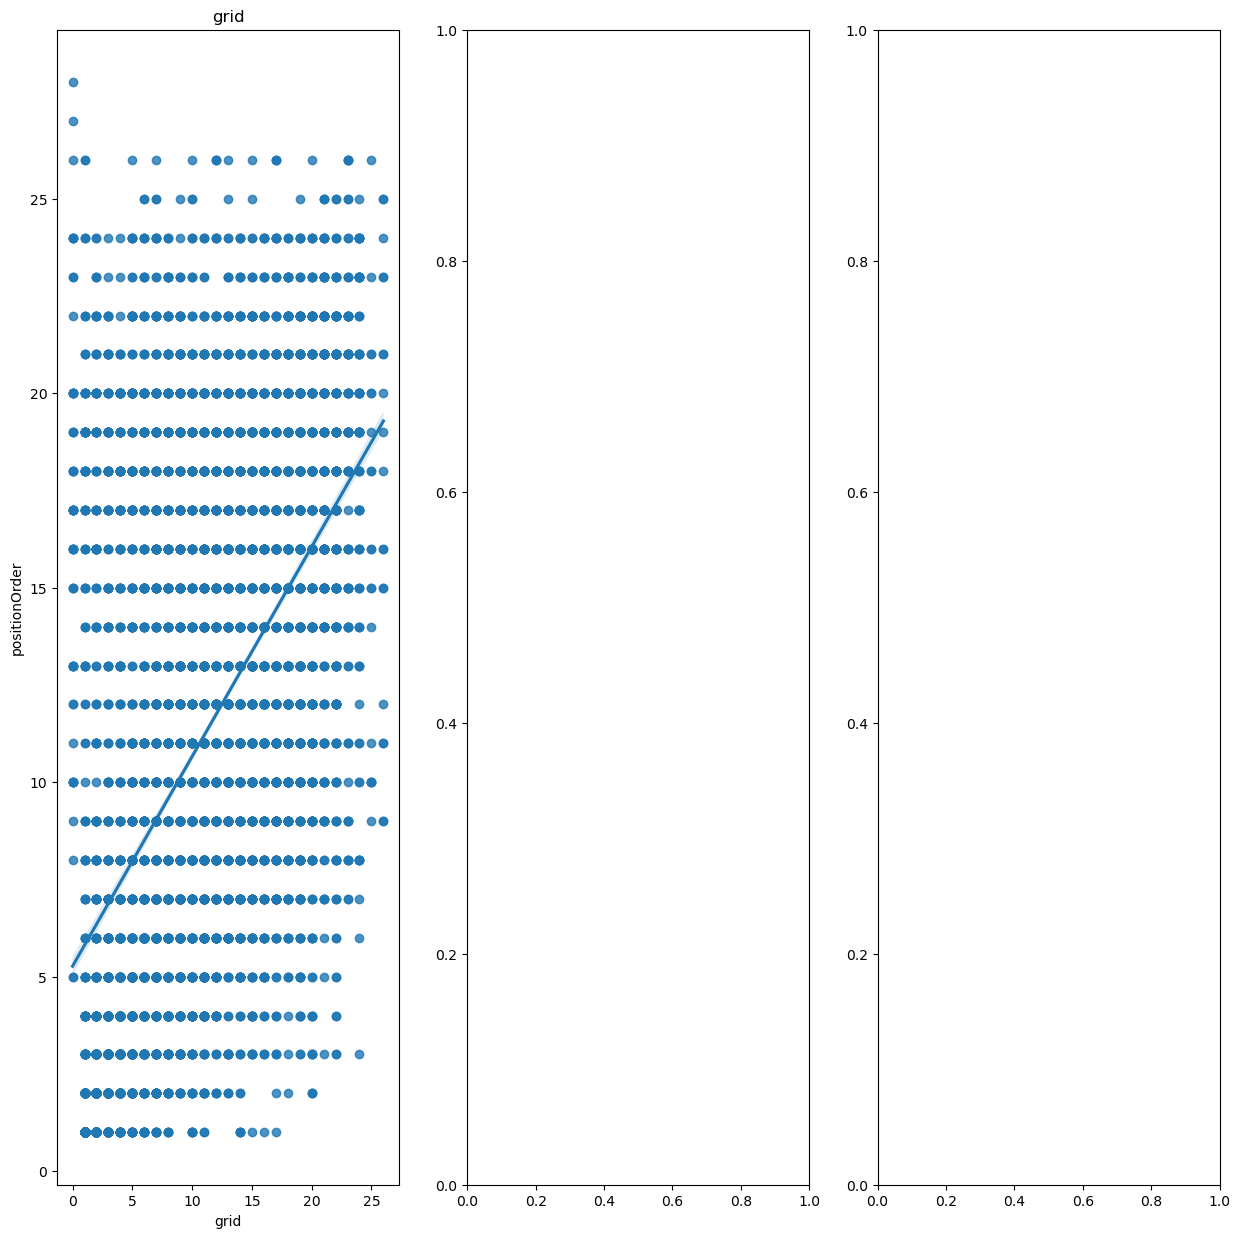

In [43]:
ds_ultils.correlation_test(ergast_combined_df_grid_no_nan,['grid'],'positionOrder')

There is a correlation of 0.6 between the grid position and race result. This highlights the importance of getting a good position on the grid as it can help drivers and teams maximise points for the race. The p value of the pearson r correlation test is less than 0.05. Therefore we can reject the Null hypothesis that grid and position in the race are not related

number of samples : 9445
Shapiro-Wilk test: ShapiroResult(statistic=0.9645418524742126, pvalue=5.310921179791057e-43)
----------
can reject null hypothesis and data may not be normally distributed

Sample size is greater than 100 
 therefore as per Central Limit Theorem reasonable to assume underlying population will be normal

Plots


c:\Users\ben44\.conda\envs\formula1\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


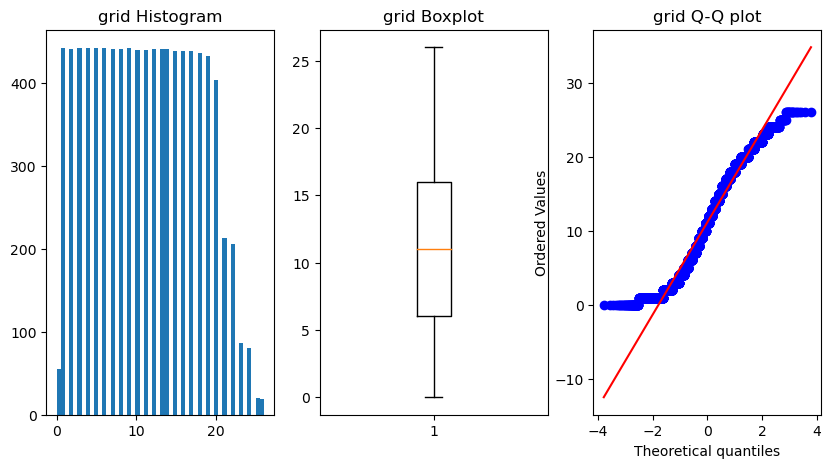

number of samples : 9445
Shapiro-Wilk test: ShapiroResult(statistic=0.9630985856056213, pvalue=1.2191296639625909e-43)
----------
can reject null hypothesis and data may not be normally distributed

Sample size is greater than 100 
 therefore as per Central Limit Theorem reasonable to assume underlying population will be normal

Plots


c:\Users\ben44\.conda\envs\formula1\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


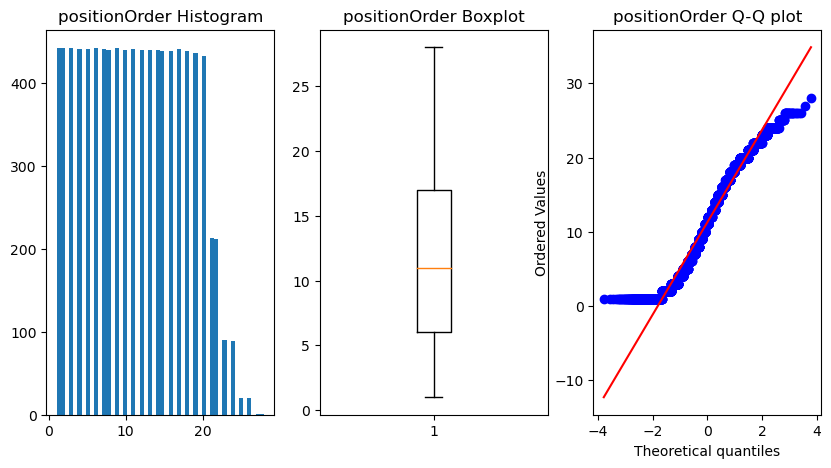

In [44]:
ds_ultils.normaility_check(ergast_combined_df_grid_no_nan,['grid','positionOrder'])

# do drivers do better in their home country?

In [45]:
ergast_combined_df.columns

Index(['raceId', 'year', 'circuitId', 'name', 'date', 'time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'lat_x', 'lng_x',
       'race_temp', 'race_precip', 'race_humidity', 'quali_temp',
       'quali_precip', 'quali_humidity', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'race_condition_wiki',
       'quali_condition_clean', 'circuitRef', 'location', 'country', 'alt',
       'qualifyId', 'driverId', 'constructorId', 'quali_position', 'q1', 'q2',
       'q3', 'resultId_x', 'grid_sprint', 'positionText_sprint',
       'positionOrder_sprint', 'points_sprint', 'laps_sprint',
       'milliseconds_sprint', 'fastestLap_sprint', 'fastestLapTime_sprint',
       'status_sprint', 'resultId_y', 'grid', 'positionText', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'status', 'driverStandingsId',
       'points_drivers', 'position_drivers', 'wins_drivers',
       'c

In [46]:
driver_home_race = ergast_combined_df.loc[ergast_combined_df['country'] == ergast_combined_df['nationality_drivers'],['driverRef','pole']]

In [47]:
driver_pole_home_race = driver_home_race.groupby(['driverRef'])['pole'].sum()

In [48]:
drivers = list(driverspoles_1_more[driverspoles_1_more>0].index)

In [49]:
drivers

['alesi',
 'alonso',
 'barrichello',
 'berger',
 'bottas',
 'button',
 'coulthard',
 'damon_hill',
 'fisichella',
 'frentzen',
 'hakkinen',
 'hamilton',
 'heidfeld',
 'hulkenberg',
 'kovalainen',
 'kubica',
 'leclerc',
 'mansell',
 'massa',
 'max_verstappen',
 'michael_schumacher',
 'montoya',
 'norris',
 'perez',
 'raikkonen',
 'ralf_schumacher',
 'ricciardo',
 'rosberg',
 'russell',
 'sainz',
 'senna',
 'stroll',
 'trulli',
 'vettel',
 'villeneuve',
 'webber']

In [50]:
driver_pole_home_race[driver_pole_home_race.index.isin(drivers)]

driverRef
alesi                 0
alonso                1
barrichello           3
button                0
coulthard             0
damon_hill            2
fisichella            0
frentzen              0
hamilton              8
heidfeld              1
hulkenberg            0
leclerc               2
massa                 3
max_verstappen        2
michael_schumacher    2
norris                0
perez                 0
ralf_schumacher       0
ricciardo             0
rosberg               2
russell               0
sainz                 0
senna                 1
stroll                0
trulli                0
vettel                2
villeneuve            0
webber                0
Name: pole, dtype: int64

In [51]:
drivers_home_percentage = driver_pole_home_race[driver_pole_home_race.index.isin(drivers)]/poles_circuits.sum(1)

In [52]:
drivers_home_percentage =drivers_home_percentage.dropna()
drivers_home_percentage = drivers_home_percentage.reset_index()
drivers_home_percentage.columns=['driverRef','polepercent']


In [53]:
drivers2= drivers_home_percentage['driverRef']
driver_pole_home_race_sum = driver_pole_home_race[driver_pole_home_race.index.isin(drivers2)]

In [54]:
driver_pole_home_race_sum=driver_pole_home_race_sum.reset_index()
driver_pole_home_race_sum.columns=['driverRef','polesum']

In [55]:
driver_home_race_plot = driver_pole_home_race_sum.merge(drivers_home_percentage,on='driverRef')

In [56]:
#driver_home_race_plot=driver_home_race_plot.set_index('driverRef')

In [57]:
data= driver_home_race_plot.melt(id_vars='driverRef')

<AxesSubplot: xlabel='polepercent', ylabel='driverRef'>

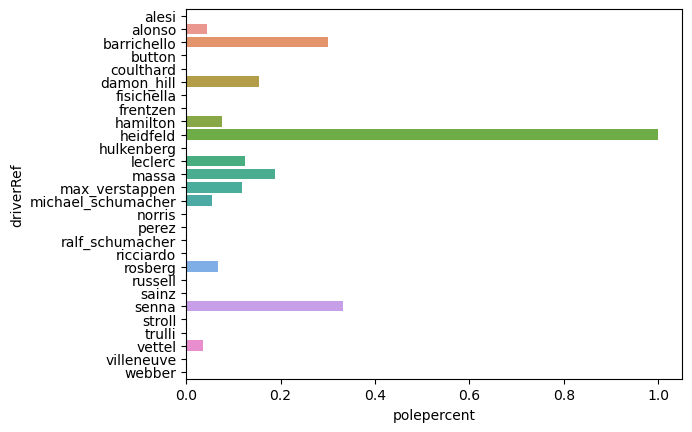

In [167]:
plt.title('Which driver did best at home?')
sns.barplot(data=drivers_home_percentage,y='driverRef',x='polepercent')
plt.xlabel('Pole percentage at home Grand Prix')
plt.ylable('Drivers')

<AxesSubplot: xlabel='polesum', ylabel='driverRef'>

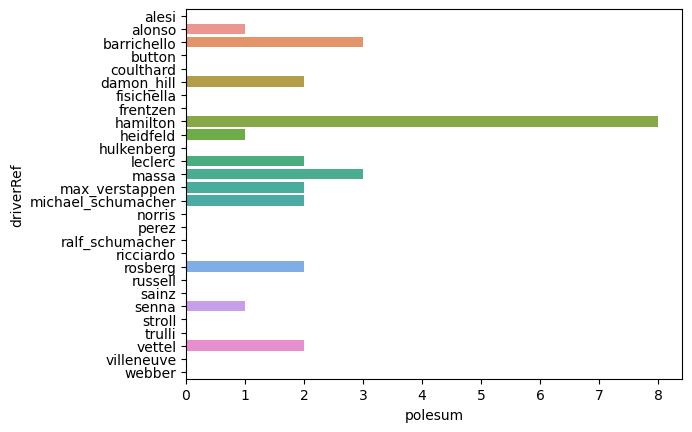

In [168]:
sns.barplot(data=driver_pole_home_race_sum,y='driverRef',x='polesum')

Hamilton has the most home poles at Silverstone, but a low home pole percentage. Barrichello and Senna did well at home with 30% of poles at home. Heidfeld got 1 pole in his career which was at home

## Does Age Matter?

In [10]:
ergast_combined_df['dob']=ergast_combined_df['dob'].astype('datetime64')
ergast_combined_df['date'] =ergast_combined_df['date'].astype('datetime64')

C:\Users\ben44\AppData\Local\Temp\ipykernel_8084\53664934.py:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  ergast_combined_df['dob']=ergast_combined_df['dob'].astype('datetime64')


In [11]:
# inspired from stackoverflow https://stackoverflow.com/questions/26788854/pandas-get-the-age-from-a-date-example-date-of-birth
ergast_combined_df['age']=(ergast_combined_df['date'] - ergast_combined_df['dob']).astype('<m8[Y]')

<AxesSubplot: xlabel='age', ylabel='Count'>

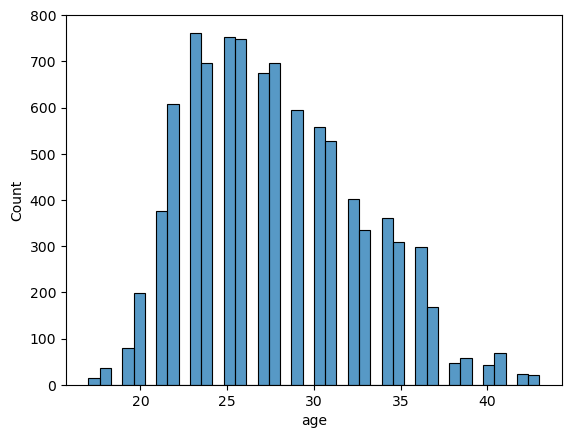

In [13]:
plt.figure()
sns.histplot(data=ergast_combined_df,x='age')
plt.title('Histogram of driver ages')
plt.show()

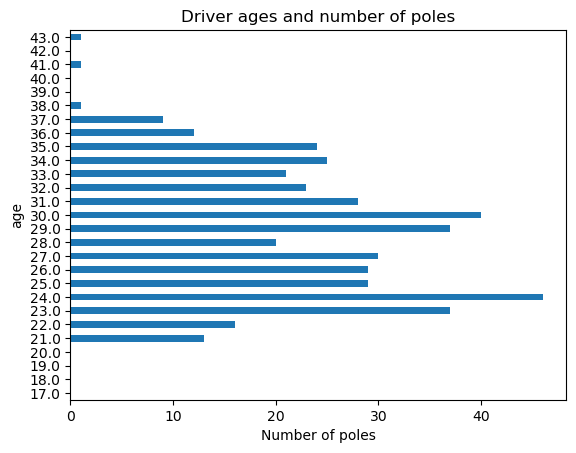

In [21]:
plt.figure()
ergast_combined_df.groupby(['age'])['pole'].sum().plot(kind='barh')
plt.title('Driver ages and number of poles')
plt.xlabel('Number of poles')
plt.show()

The number of poles with age seems to match the histogram of age very well indicating that the average driver age is 25 which also has the most poles. However there is a second peak at 30 which could indicate that older drivers as they mature are more likely to get pole position. 

statistical test